
plaintext           ciphertext                      key
zxcvbnml          b"\x1c\xf9lJ\xd7\xc2]'"          kljnopuy
rxcvbnml          b'\x82\xa8\xa1f\xbe=\xb7\xd9'          kljnopuy
zrcvbnml          b'\x816\x8c\xf2\x7f\xd8A\n'          kljnopuy
zxtvbnml          b'\xec\x85\xdb\xa8\x13ib\xd7'          kljnopuy
zxcybnml          b'\xe2V\xf1}\xeb\x10\x106'          kljnopuy
zxcvinml          b'\xc1S_T/\x944L'          kljnopuy


Hamming distances
Round 0 [1, 1, 1, 1, 1]
Round 1 [6, 6, 7, 12, 14]
Round 2 [19, 17, 22, 21, 33]
Round 3 [31, 25, 33, 26, 39]
Round 4 [31, 27, 34, 27, 38]
Round 5 [32, 29, 28, 27, 37]
Round 6 [40, 32, 29, 27, 35]
Round 7 [30, 37, 37, 29, 32]
Round 8 [28, 31, 34, 36, 31]
Round 9 [39, 26, 30, 35, 33]
Round 10 [36, 26, 30, 29, 35]
Round 11 [35, 30, 32, 32, 35]
Round 12 [38, 35, 33, 33, 33]
Round 13 [36, 36, 33, 32, 29]
Round 14 [30, 36, 31, 35, 23]
Round 15 [35, 35, 34, 34, 30]
Round 16 [40, 31, 37, 37, 36]


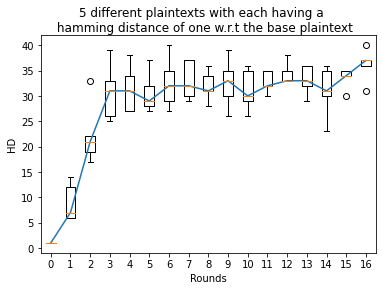


plaintext           ciphertext                      key
zxcvbnml          b"\x1c\xf9lJ\xd7\xc2]'"          kljnopuy
rxcvbnml          b'\x82\xa8\xa1f\xbe=\xb7\xd9'          kljnopuy
rtcvbnml          b']\xae\x96\xb5\xa6<\xac\xdb'          kljnopuy
rtivbnml          b'\xe0P8\xd6p\xd6\x84\x88'          kljnopuy
rtiobnml          b'\xdbDoq\x9c\x0e\xea('          kljnopuy
rtiopnml          b'\xf1\xa27M\xdb\x83\xa8M'          kljnopuy


Hamming distances
Round 0 [1, 2, 3, 4, 5]
Round 1 [6, 6, 11, 15, 13]
Round 2 [19, 14, 23, 28, 17]
Round 3 [31, 27, 36, 28, 29]
Round 4 [31, 34, 41, 26, 39]
Round 5 [32, 35, 35, 29, 37]
Round 6 [40, 39, 29, 26, 33]
Round 7 [30, 35, 34, 25, 34]
Round 8 [28, 26, 37, 29, 35]
Round 9 [39, 28, 33, 35, 33]
Round 10 [36, 34, 26, 34, 37]
Round 11 [35, 36, 22, 36, 37]
Round 12 [38, 28, 27, 35, 28]
Round 13 [36, 21, 31, 29, 30]
Round 14 [30, 25, 29, 28, 33]
Round 15 [35, 33, 31, 32, 29]
Round 16 [40, 43, 35, 36, 33]


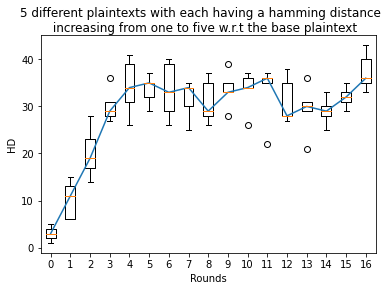


plaintext              ciphertext                         key
kljnopuy          b'\xcc\xc7\x97\xf9\xdc\xdeFg'          zxcvbnml
kljnopuy          b'\x00\xb23G\x83K Q'          rxcvbnml
kljnopuy          b'`\xe2\x9aZ\xa8\xa4\xdb\x81'          zrcvbnml
kljnopuy          b'ZF\xe9\xd1q\xe3\x18\x88'          zxtvbnml
kljnopuy          b'\xceg\x9c\x9a\xd0>\xa0('          zxcybnml
kljnopuy          b'=\xde8\xc0\x8b\xd2>3'          zxcvinml


Hamming distances
Round 0 [0, 0, 0, 0, 0]
Round 1 [2, 5, 9, 4, 2]
Round 2 [7, 25, 27, 18, 14]
Round 3 [18, 38, 33, 27, 26]
Round 4 [31, 33, 34, 32, 31]
Round 5 [32, 30, 37, 34, 31]
Round 6 [33, 32, 35, 35, 28]
Round 7 [32, 33, 34, 36, 25]
Round 8 [27, 31, 32, 34, 25]
Round 9 [29, 33, 29, 35, 28]
Round 10 [27, 37, 33, 36, 27]
Round 11 [25, 36, 31, 33, 32]
Round 12 [34, 35, 27, 32, 34]
Round 13 [38, 31, 27, 33, 29]
Round 14 [31, 29, 30, 28, 31]
Round 15 [30, 33, 37, 28, 30]
Round 16 [36, 33, 36, 25, 32]


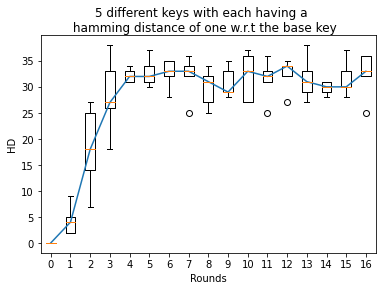

In [6]:
import sys
import statistics
import matplotlib.pyplot as plot

# DES implementation taken from https://gist.github.com/eigenein/1275094#file-pydes-py-L61
# _pythonMajorVersion is used to handle Python2 and Python3 differences.
_pythonMajorVersion = sys.version_info[0]

# Modes of crypting / cyphering
ECB =	0
CBC =	1

# Modes of padding
PAD_NORMAL = 1
PAD_PKCS5 = 2

# PAD_PKCS5: is a method that will unambiguously remove all padding
#            characters after decryption, when originally encrypted with
#            this padding mode.
# For a good description of the PKCS5 padding technique, see:
# http://www.faqs.org/rfcs/rfc1423.html

# The base class shared by des and triple des.

lis_main=[]
class _baseDes(object):
	def __init__(self, mode=ECB, IV=None, pad=None, padmode=PAD_NORMAL):
		if IV:
			IV = self._guardAgainstUnicode(IV)
		if pad:
			pad = self._guardAgainstUnicode(pad)
		self.block_size = 8
		# Sanity checking of arguments.
		if pad and padmode == PAD_PKCS5:
			raise ValueError("Cannot use a pad character with PAD_PKCS5")
		if IV and len(IV) != self.block_size:
			raise ValueError("Invalid Initial Value (IV), must be a multiple of " + str(self.block_size) + " bytes")

		# Set the passed in variables
		self._mode = mode
		self._iv = IV
		self._padding = pad
		self._padmode = padmode

	def getKey(self):
		"""getKey() -> bytes"""
		return self.__key

	def setKey(self, key):
		"""Will set the crypting key for this object."""
		key = self._guardAgainstUnicode(key)
		self.__key = key

	def getMode(self):
		"""getMode() -> pyDes.ECB or pyDes.CBC"""
		return self._mode

	def setMode(self, mode):
		"""Sets the type of crypting mode, pyDes.ECB or pyDes.CBC"""
		self._mode = mode

	def getPadding(self):
		"""getPadding() -> bytes of length 1. Padding character."""
		return self._padding

	def setPadding(self, pad):
		"""setPadding() -> bytes of length 1. Padding character."""
		if pad is not None:
			pad = self._guardAgainstUnicode(pad)
		self._padding = pad

	def getPadMode(self):
		"""getPadMode() -> pyDes.PAD_NORMAL or pyDes.PAD_PKCS5"""
		return self._padmode
		
	def setPadMode(self, mode):
		"""Sets the type of padding mode, pyDes.PAD_NORMAL or pyDes.PAD_PKCS5"""
		self._padmode = mode

	def getIV(self):
		"""getIV() -> bytes"""
		return self._iv

	def setIV(self, IV):
		"""Will set the Initial Value, used in conjunction with CBC mode"""
		if not IV or len(IV) != self.block_size:
			raise ValueError("Invalid Initial Value (IV), must be a multiple of " + str(self.block_size) + " bytes")
		IV = self._guardAgainstUnicode(IV)
		self._iv = IV

	def _padData(self, data, pad, padmode):
		# Pad data depending on the mode
		if padmode is None:
			# Get the default padding mode.
			padmode = self.getPadMode()
		if pad and padmode == PAD_PKCS5:
			raise ValueError("Cannot use a pad character with PAD_PKCS5")

		if padmode == PAD_NORMAL:
			if len(data) % self.block_size == 0:
				# No padding required.
				return data

			if not pad:
				# Get the default padding.
				pad = self.getPadding()
			if not pad:
				raise ValueError("Data must be a multiple of " + str(self.block_size) + " bytes in length. Use padmode=PAD_PKCS5 or set the pad character.")
			data += (self.block_size - (len(data) % self.block_size)) * pad
		
		elif padmode == PAD_PKCS5:
			pad_len = 8 - (len(data) % self.block_size)
			if _pythonMajorVersion < 3:
				data += pad_len * chr(pad_len)
			else:
				data += bytes([pad_len] * pad_len)

		return data

	def _unpadData(self, data, pad, padmode):
		# Unpad data depending on the mode.
		if not data:
			return data
		if pad and padmode == PAD_PKCS5:
			raise ValueError("Cannot use a pad character with PAD_PKCS5")
		if padmode is None:
			# Get the default padding mode.
			padmode = self.getPadMode()

		if padmode == PAD_NORMAL:
			if not pad:
				# Get the default padding.
				pad = self.getPadding()
			if pad:
				data = data[:-self.block_size] + \
				       data[-self.block_size:].rstrip(pad)

		elif padmode == PAD_PKCS5:
			if _pythonMajorVersion < 3:
				pad_len = ord(data[-1])
			else:
				pad_len = data[-1]
			data = data[:-pad_len]

		return data

	def _guardAgainstUnicode(self, data):
		# Only accept byte strings or ascii unicode values, otherwise
		# there is no way to correctly decode the data into bytes.
		if _pythonMajorVersion < 3:
			if isinstance(data, unicode):
				raise ValueError("pyDes can only work with bytes, not Unicode strings.")
		else:
			if isinstance(data, str):
				# Only accept ascii unicode values.
				try:
					return data.encode('ascii')
				except UnicodeEncodeError:
					pass
				raise ValueError("pyDes can only work with encoded strings, not Unicode.")
		return data

#############################################################################
# 				    DES					    #
#############################################################################
class des(_baseDes):
	"""DES encryption/decrytpion class
	Supports ECB (Electronic Code Book) and CBC (Cypher Block Chaining) modes.
	pyDes.des(key,[mode], [IV])
	key  -> Bytes containing the encryption key, must be exactly 8 bytes
	mode -> Optional argument for encryption type, can be either pyDes.ECB
		(Electronic Code Book), pyDes.CBC (Cypher Block Chaining)
	IV   -> Optional Initial Value bytes, must be supplied if using CBC mode.
		Must be 8 bytes in length.
	pad  -> Optional argument, set the pad character (PAD_NORMAL) to use
		during all encrypt/decrpt operations done with this instance.
	padmode -> Optional argument, set the padding mode (PAD_NORMAL or
		PAD_PKCS5) to use during all encrypt/decrpt operations done
		with this instance.
	"""


	# Permutation and translation tables for DES
	__pc1 = [56, 48, 40, 32, 24, 16,  8,
		  0, 57, 49, 41, 33, 25, 17,
		  9,  1, 58, 50, 42, 34, 26,
		 18, 10,  2, 59, 51, 43, 35,
		 62, 54, 46, 38, 30, 22, 14,
		  6, 61, 53, 45, 37, 29, 21,
		 13,  5, 60, 52, 44, 36, 28,
		 20, 12,  4, 27, 19, 11,  3
	]

	# number left rotations of pc1
	__left_rotations = [
		1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1
	]

	# permuted choice key (table 2)
	__pc2 = [
		13, 16, 10, 23,  0,  4,
		 2, 27, 14,  5, 20,  9,
		22, 18, 11,  3, 25,  7,
		15,  6, 26, 19, 12,  1,
		40, 51, 30, 36, 46, 54,
		29, 39, 50, 44, 32, 47,
		43, 48, 38, 55, 33, 52,
		45, 41, 49, 35, 28, 31
	]

	# initial permutation IP
	__ip = [57, 49, 41, 33, 25, 17, 9,  1,
		59, 51, 43, 35, 27, 19, 11, 3,
		61, 53, 45, 37, 29, 21, 13, 5,
		63, 55, 47, 39, 31, 23, 15, 7,
		56, 48, 40, 32, 24, 16, 8,  0,
		58, 50, 42, 34, 26, 18, 10, 2,
		60, 52, 44, 36, 28, 20, 12, 4,
		62, 54, 46, 38, 30, 22, 14, 6
	]

	# Expansion table for turning 32 bit blocks into 48 bits
	__expansion_table = [
		31,  0,  1,  2,  3,  4,
		 3,  4,  5,  6,  7,  8,
		 7,  8,  9, 10, 11, 12,
		11, 12, 13, 14, 15, 16,
		15, 16, 17, 18, 19, 20,
		19, 20, 21, 22, 23, 24,
		23, 24, 25, 26, 27, 28,
		27, 28, 29, 30, 31,  0
	]

	# The (in)famous S-boxes
	__sbox = [
		# S1
		[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7,
		 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8,
		 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0,
		 15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],

		# S2
		[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10,
		 3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5,
		 0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15,
		 13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],

		# S3
		[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8,
		 13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1,
		 13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7,
		 1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],

		# S4
		[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15,
		 13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9,
		 10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4,
		 3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],

		# S5
		[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9,
		 14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6,
		 4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14,
		 11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],

		# S6
		[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11,
		 10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8,
		 9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6,
		 4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],

		# S7
		[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1,
		 13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6,
		 1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2,
		 6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],

		# S8
		[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7,
		 1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2,
		 7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8,
		 2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
	]


	# 32-bit permutation function P used on the output of the S-boxes
	__p = [
		15, 6, 19, 20, 28, 11,
		27, 16, 0, 14, 22, 25,
		4, 17, 30, 9, 1, 7,
		23,13, 31, 26, 2, 8,
		18, 12, 29, 5, 21, 10,
		3, 24
	]

	# final permutation IP^-1
	__fp = [
		39,  7, 47, 15, 55, 23, 63, 31,
		38,  6, 46, 14, 54, 22, 62, 30,
		37,  5, 45, 13, 53, 21, 61, 29,
		36,  4, 44, 12, 52, 20, 60, 28,
		35,  3, 43, 11, 51, 19, 59, 27,
		34,  2, 42, 10, 50, 18, 58, 26,
		33,  1, 41,  9, 49, 17, 57, 25,
		32,  0, 40,  8, 48, 16, 56, 24
	]

	# Type of crypting being done
	ENCRYPT =	0x00
	DECRYPT =	0x01

	# Initialisation
	def __init__(self, key, mode=ECB, IV=None, pad=None, padmode=PAD_NORMAL):
		# Sanity checking of arguments.
		if len(key) != 8:
			raise ValueError("Invalid DES key size. Key must be exactly 8 bytes long.")
		_baseDes.__init__(self, mode, IV, pad, padmode)
		self.key_size = 8

		self.L = []
		self.R = []
		self.Kn = [ [0] * 48 ] * 16	# 16 48-bit keys (K1 - K16)
		self.final = []

		self.setKey(key)

	def setKey(self, key):
		"""Will set the crypting key for thi print('\n')s object. Must be 8 bytes."""
		_baseDes.setKey(self, key)
		self.__create_sub_keys()

	def __String_to_BitList(self, data):
		"""Turn the string data, into a list of bits (1, 0)'s"""
		if _pythonMajorVersion < 3:
			# Turn the strings into integers. Python 3 uses a bytes
			# class, which already has this behaviour.
			data = [ord(c) for c in data]
		l = len(data) * 8
		result = [0] * l
		pos = 0
		for ch in data:
			i = 7
			while i >= 0:
				if ch & (1 << i) != 0:
					result[pos] = 1
				else:
					result[pos] = 0
				pos += 1
				i -= 1

		return result

	def __BitList_to_String(self, data):
		"""Turn the list of bits -> data, into a string"""
		result = []
		pos = 0
		c = 0
		while pos < len(data):
			c += data[pos] << (7 - (pos % 8))
			if (pos % 8) == 7:
				result.append(c)
				c = 0
			pos += 1

		if _pythonMajorVersion < 3:
			return ''.join([ chr(c) for c in result ])
		else:
			return bytes(result)

	def __permutate(self, table, block):
		"""Permutate this block with the specified table"""
		return list(map(lambda x: block[x], table))
	
	# Transform the secret key, so that it is ready for data processing
	# Create the 16 subkeys, K[1] - K[16]
	def __create_sub_keys(self):
		"""Create the 16 subkeys K[1] to K[16] from the given key"""
		key = self.__permutate(des.__pc1, self.__String_to_BitList(self.getKey()))
		i = 0
		# Split into Left and Right sections
		self.L = key[:28]
		self.R = key[28:]
		while i < 16:
			j = 0
			# Perform circular left shifts
			while j < des.__left_rotations[i]:
				self.L.append(self.L[0])
				del self.L[0]

				self.R.append(self.R[0])
				del self.R[0]

				j += 1

			# Create one of the 16 subkeys through pc2 permutation
			self.Kn[i] = self.__permutate(des.__pc2, self.L + self.R)

			i += 1

	# Main part of the encryption algorithm, the number cruncher :)
	def __des_crypt(self, block, crypt_type):
		"""Crypt the block of data through DES bit-manipulation"""
		block = self.__permutate(des.__ip, block)
		self.L = block[:32]
		self.R = block[32:]

		# Encryption starts from Kn[1] through to Kn[16]
		if crypt_type == des.ENCRYPT:
			iteration = 0
			iteration_adjustment = 1
		# Decryption starts from Kn[16] down to Kn[1]
		else:
			iteration = 15
			iteration_adjustment = -1

		i = 0
		while i < 16:
			# Make a copy of R[i-1], this will later become L[i]
			tempR = self.R[:]

			# Permutate R[i - 1] to start creating R[i]
			self.R = self.__permutate(des.__expansion_table, self.R)

			# Exclusive or R[i - 1] with K[i], create B[1] to B[8] whilst here
			self.R = list(map(lambda x, y: x ^ y, self.R, self.Kn[iteration]))
			B = [self.R[:6], self.R[6:12], self.R[12:18], self.R[18:24], self.R[24:30], self.R[30:36], self.R[36:42], self.R[42:]]
			# Optimization: Replaced below commented code with above
			#j = 0
			#B = []
			#while j < len(self.R):
			#	self.R[j] = self.R[j] ^ self.Kn[iteration][j]
			#	j += 1
			#	if j % 6 == 0:
			#		B.append(self.R[j-6:j])

			# Permutate B[1] to B[8] using the S-Boxes
			j = 0
			Bn = [0] * 32
			pos = 0
			while j < 8:
				# Work out the offsets
				m = (B[j][0] << 1) + B[j][5]
				n = (B[j][1] << 3) + (B[j][2] << 2) + (B[j][3] << 1) + B[j][4]

				# Find the permutation value
				v = des.__sbox[j][(m << 4) + n]

				# Turn value into bits, add it to result: Bn
				Bn[pos] = (v & 8) >> 3
				Bn[pos + 1] = (v & 4) >> 2
				Bn[pos + 2] = (v & 2) >> 1
				Bn[pos + 3] = v & 1

				pos += 4
				j += 1

			# Permutate the concatination of B[1] to B[8] (Bn)
			self.R = self.__permutate(des.__p, Bn)

			# Xor with L[i - 1]
			self.R = list(map(lambda x, y: x ^ y, self.R, self.L))
			# Optimization: This now replaces the below commented code
			#j = 0
			#while j < len(self.R):
			#	self.R[j] = self.R[j] ^ self.L[j]
			#	j += 1

			# L[i] becomes R[i - 1]
			self.L = tempR;lis_main.append(self.L+self.R)

			i += 1
			iteration += iteration_adjustment
		
		# Final permutation of R[16]L[16]
		self.final = self.__permutate(des.__fp, self.R + self.L); lis_main.append(self.final)
		return self.final


	# Data to be encrypted/decrypted
	def crypt(self, data, crypt_type):
		"""Crypt the data in blocks, running it through des_crypt()"""

		# Error check the data
		if not data:
			return ''
		if len(data) % self.block_size != 0:
			if crypt_type == des.DECRYPT: # Decryption must work on 8 byte blocks
				raise ValueError("Invalid data length, data must be a multiple of " + str(self.block_size) + " bytes\n.")
			if not self.getPadding():
				raise ValueError("Invalid data length, data must be a multiple of " + str(self.block_size) + " bytes\n. Try setting the optional padding character")
			else:
				data += (self.block_size - (len(data) % self.block_size)) * self.getPadding()
			# print "Len of data: %f" % (len(data) / self.block_size)

		if self.getMode() == CBC:
			if self.getIV():
				iv = self.__String_to_BitList(self.getIV())
			else:
				raise ValueError("For CBC mode, you must supply the Initial Value (IV) for ciphering")

		# Split the data into blocks, crypting each one seperately
		i = 0
		dict = {}
		result = []
		#cached = 0
		#lines = 0
		while i < len(data):
			# Test code for caching encryption results
			#lines += 1
			#if dict.has_key(data[i:i+8]):
				#print "Cached result for: %s" % data[i:i+8]
			#	cached += 1
			#	result.append(dict[data[i:i+8]])
			#	i += 8
			#	continue
				
			block = self.__String_to_BitList(data[i:i+8])

			# Xor with IV if using CBC mode
			if self.getMode() == CBC:
				if crypt_type == des.ENCRYPT:
					block = list(map(lambda x, y: x ^ y, block, iv))
					#j = 0
					#while j < len(block):
					#	block[j] = block[j] ^ iv[j]
					#	j += 1

				processed_block = self.__des_crypt(block, crypt_type)

				if crypt_type == des.DECRYPT:
					processed_block = list(map(lambda x, y: x ^ y, processed_block, iv))
					#j = 0
					#while j < len(processed_block):
					#	processed_block[j] = processed_block[j] ^ iv[j]
					#	j += 1
					iv = block
				else:
					iv = processed_block
			else:
				processed_block = self.__des_crypt(block, crypt_type)


			# Add the resulting crypted block to our list
			#d = self.__BitList_to_String(processed_block)
			#result.append(d)
			result.append(self.__BitList_to_String(processed_block))
			#dict[data[i:i+8]] = d
			i += 8

		# print "Lines: %d, cached: %d" % (lines, cached)

		# Return the full crypted string
		if _pythonMajorVersion < 3:
			return ''.join(result)
		else:
			return bytes.fromhex('').join(result)

	def encrypt(self, data, pad=None, padmode=None):
		"""encrypt(data, [pad], [padmode]) -> bytes
		data : Bytes to be encrypted
		pad  : Optional argument for encryption padding. Must only be one byte
		padmode : Optional argument for overriding the padding mode.
		The data must be a multiple of 8 bytes and will be encrypted
		with the already specified key. Data does not have to be a
		multiple of 8 bytes if the padding character is supplied, or
		the padmode is set to PAD_PKCS5, as bytes will then added to
		ensure the be padded data is a multiple of 8 bytes.
		"""
		data = self._guardAgainstUnicode(data)
		if pad is not None:
			pad = self._guardAgainstUnicode(pad)
		data = self._padData(data, pad, padmode)
		return self.crypt(data, des.ENCRYPT)

	def decrypt(self, data, pad=None, padmode=None):
		"""decrypt(data, [pad], [padmode]) -> bytes
		data : Bytes to be encrypted
		pad  : Optional argument for decryption padding. Must only be one byte
		padmode : Optional argument for overriding the padding mode.
		The data must be a multiple of 8 bytes and will be decrypted
		with the already specified key. In PAD_NORMAL mode, if the
		optional padding character is supplied, then the un-encrypted
		data will have the padding characters removed from the end of
		the bytes. This pad removal only occurs on the last 8 bytes of
		the data (last data block). In PAD_PKCS5 mode, the special
		padding end markers will be removed from the data after decrypting.
		"""
		data = self._guardAgainstUnicode(data)
		if pad is not None:
			pad = self._guardAgainstUnicode(pad)
		data = self.crypt(data, des.DECRYPT)
		return self._unpadData(data, pad, padmode)
    
    
# different plaintexts and different keys for avalanche effect

def get_lis(k,ptext,key):                    
    lis1=[]                           
    print('\nplaintext           ciphertext                      key')
    for pt in ptext:
        d=k.encrypt(pt)
        print(pt,d,key,sep='          ')
        lis1.append(lis_main.copy())
        lis_main.clear()
    print('\n')
    return lis1

# calculating hamming distance between two strings
def hamming_dis(s1,s2):                 
        dis=0
        for i in range(len(s1)):
            if s1[i]!=s2[i]: dis+=1
        return dis
            
def get_plot(lis1,name,inc,initial):
    compare=lis1[1:]
    base=lis1[0]
    x=initial
    hmg=[]
    for i,li in enumerate(compare):
        temp=[]
        temp.append(x)
        x=x+inc                          
        for j,string in enumerate(li):
            str2=''.join([str(x) for x in compare[i][j]]).strip()
            str1=''.join([str(x) for x in base[j]]).strip()
            temp.append(hamming_dis(str1,str2))
        hmg.append(temp)
    plot_list=[]    
    for j in range(len(hmg[0])-1):
        temp=[]
        for i in range(len(hmg)):
            temp.append(hmg[i][j])            
        plot_list.append(temp)
     
    print('Hamming distances')
    for s,kk in enumerate(plot_list):
        print('Round '+str(s),kk,sep=' ')
        
    plot_list=tuple(plot_list)
    medians=[statistics.median(test_list) for test_list in plot_list]
    
    fig = plot.figure()                           
    plot.boxplot(plot_list,positions=[l for l in range(0,17)])
    plot.plot([l for l in range(0,17)],medians)
    fig.suptitle(name)
    plot.xlabel('Rounds')
    plot.ylabel('HD')
    fig.savefig(name+'.png')
    plot.show()
    
k = des('kljnopuy')

# i)
# The first string of pti is the reference plaintext others have a HD of one w.r.t to this reference plaintext
pti=['zxcvbnml','rxcvbnml','zrcvbnml','zxtvbnml','zxcybnml','zxcvinml']
get_plot(get_lis(k,pti,'kljnopuy'),"5 different plaintexts with each having a \n hamming distance of one w.r.t the base plaintext",0,1)

# ii)
# The first string of pti is the reference plaintext others have 
# HDs of one, two, three, four, five respectively w.r.t to this reference plaintext
ptii=['zxcvbnml','rxcvbnml','rtcvbnml','rtivbnml','rtiobnml','rtiopnml']
get_plot(get_lis(k,ptii,'kljnopuy'), \
         "5 different plaintexts with each having a hamming distance \n increasing from one to five w.r.t the base plaintext",1,1)

# iii)
# The first string of k_list is the reference key others have a HD of one w.r.t to this reference key
k_list=[des('zxcvbnml'),des('rxcvbnml'),des('zrcvbnml'),des('zxtvbnml'),des('zxcybnml'),des('zxcvinml')]
k_list1=['zxcvbnml','rxcvbnml','zrcvbnml','zxtvbnml','zxcybnml','zxcvinml']
plaintext='kljnopuy'

lis=[]
print('\nplaintext              ciphertext                         key')
for i,key in enumerate(k_list):
    d=key.encrypt(plaintext)
    print(plaintext,d,k_list1[i],sep='          ')
    lis.append(lis_main.copy())
    lis_main.clear()
print('\n')
    
get_plot(lis,"5 different keys with each having a \n hamming distance of one w.r.t the base key",0,0)
